38% of the passangers surived
19% of the males surived
74% of the females surived
{'Survived': 342, 'Died': 549, 'nodata': 0}
Average age was 29.848
Male average age was 30.85
Female average age was 28.152


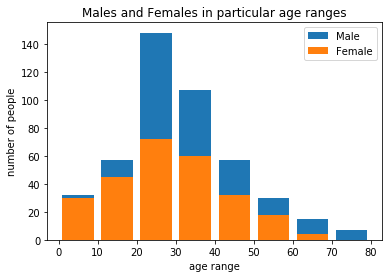

Most frequent male surnames are Panula, Rice, Williams.
Most frequent female surnames are Andersson, Baclini, Palsson.


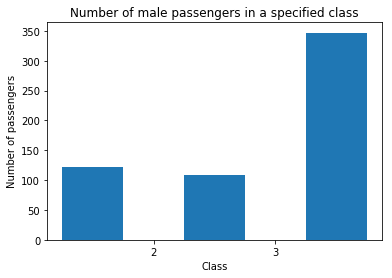

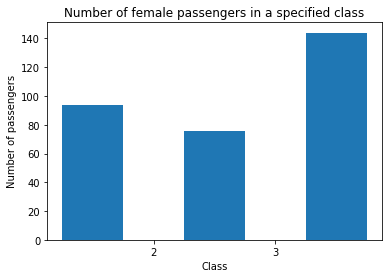

In [9]:
# jaki procent pasażerów przeżył oraz określenie jaki procent mezczyzn i kobiet przezyl 1pkt
# funkcja zwracajaca slownik z liczbami osob ktore: przezyly, zginely, nie wiadomo 1pkt
# policzenie sredniego wieku pasazerow: w sumie, kobiet, mezcyzn 1pkt
# narysowanie histogramów z wiekiem pasażrów z podziałem na meskie i zenskie 1ppkt
# znalezienie trzech najczesciej wystepujacych nazwisk meskich oraz zenskich 0.5pkt
# narysowanie na wykresie histogramow pokazujacych liczbe kobiet oraz mezczyzn w poszczegolnych klasach 0.5pkt


# Kinga Fimiarz


import matplotlib.pyplot as plt
import csv

def survived_percent():
    with open('titanic.csv', 'r') as t: #całość otwiera plik titanic.csv w trybie "read",mozliwy jest odczyt pliku, pisanie nie 
        titanic = csv.DictReader(t)#plik jest juz otwarty i wrzucam go jako argument csv.DictReader(), to ten DictReader otwiera go jako
        survived = 0#slownik zeby nie wadzily cudzyslowy itd
        died = 0
        #nodata=0
        for line in titanic:
            if line['Survived'] == '1':
                survived += 1
            #elif line['Survived']=='0':
               # died+= 1
            #else:
                #nodata+=1
            else:
                died += 1
    percent = int(round(survived / (survived + died),2) * 100)
    return f'{percent}% of the passangers surived'

print(survived_percent())


def male_survived_percent():
    with open('titanic.csv', 'r') as t:#blok "with..." to  "menedżer kontekstu", który otwiera plik i zamyka go po wykonaniu instrukcji,
        titanic = csv.DictReader(t)#oraz zamyka gdy wewnatrz wystapi blad
        survived = 0
        died = 0
        for line in titanic:
            if line['Sex'] == 'male':
                if line['Survived'] == '1':
                    survived += 1
                else:
                    died += 1
        percent = int(round(survived / (survived + died), 2) * 100)
        return f'{percent}% of the males surived'

print(male_survived_percent())



def female_survived_percent():
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        survived = 0
        died = 0
        for line in titanic:
            if line['Sex'] == 'female':
                if line['Survived'] == '1':
                    survived += 1
                else:
                    died += 1
        percent = int(round(survived / (survived + died), 2) * 100)
        return f'{percent}% of the females surived'

print(female_survived_percent())



def survived_dictonary():
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        survived = 0
        died = 0
        nodata=0
        i = 0
        d = {}
        for line in titanic:
            if line['Survived'] == '1':
                survived += 1
            elif line['Survived']=='0':
                died += 1
            else:
                nodata+=1
            #else:
                #died += 1
        d['Survived'] = survived
        d['Died'] = died
        d['nodata']=nodata
        return d
print(survived_dictonary())



def average_age():
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        age = 0
        i = 0
        for line in titanic:
            try:
                age += int(line['Age'])
                i += 1
            except ValueError:
                pass
                # print(f'Wrong data format for ID {line["PassengerId"]}. It has been skipped.')
        avg = round(age / i,3)
        return f'Average age was {avg}'

print(average_age())



def male_average_age():
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        age = 0
        i = 0
        for line in titanic:
            if line['Sex'] == 'male':
                try:#blok try expect wykonuje to co jest w try,a jak jest blad np zly format to nie wywala programu,tylko robi expect i dalej petle
                    age += int(line['Age'])
                    i += 1
                except ValueError:# tu w except jest pass, pass nic nie robi ale cos musi byc i dalej leci z pętlą
                    pass
                    #print(f'Wrong data format for ID {line["PassengerId"]}. It has been skipped.')
        avg = round(age / i, 3)
        return f'Male average age was {avg}'

print(male_average_age())



def female_average_age():
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        age = 0
        i = 0
        for line in titanic:
            if line['Sex'] == 'female':
                try:
                    age += int(line['Age'])
                    i += 1
                except ValueError:
                    pass
                    #print(f'Wrong data format for ID {line["PassengerId"]}. It has been skipped.')
        avg = round(age / i, 3)
        return f'Female average age was {avg}'

print(female_average_age())



def hist_ages():
    male_ages = []
    female_ages = []
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        for line in titanic:
            if line['Sex'] == 'male':
                if line['Age'] == '': continue
                try:
                    male_ages.append(line['Age'])
                except ValueError:
                    print(f'Wrong data format for ID {line["PassengerId"]}. It has been skipped.')
            else:
                if line['Age'] == '': continue
                try:
                    female_ages.append(line['Age'])
                except ValueError:
                    print(f'Wrong data format for ID {line["PassengerId"]}. It has been skipped.')
    male_ages = [float(x) for x in male_ages]
    female_ages = [float(x) for x in female_ages]
    male_ages.sort()
    female_ages.sort()
    bins = [0,10,20,30,40,50,60,70,80]
    plt.hist(male_ages,bins,rwidth=0.8, label='Male')
    plt.hist(female_ages,bins,rwidth=0.8, label='Female')
    plt.xlabel('age range')
    plt.ylabel('number of people')
    plt.legend()
    plt.title('Males and Females in particular age ranges')
    plt.show()

hist_ages()



def frequent_surnames(sex):
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        surnames = []
        d = {}
        for line in titanic:
            if line['Sex'] == sex:
                surnames.append(line['Name'].split(',')[0])#split dzieli stringi względem podanego separatora, tu przecinek i
        for surname in surnames:# i bierze nazwisko
            if surname in d.keys():
                d[surname] += 1
            else:
                d[surname] = 0
    most_frequent = sorted(d, key= d.get, reverse=True)[:3]
    mf = ''
    for i in most_frequent:
        mf += i+', '
    mf = mf[:-2]
    print(f'Most frequent {sex} surnames are {mf}.')

frequent_surnames('male')
frequent_surnames('female')



def people_in_class(sex):
    with open('titanic.csv', 'r') as t:
        titanic = csv.DictReader(t)
        cls = []
        for line in titanic:
            if line['Sex'] == sex:
               cls.append(line['Pclass'])
    cls.sort()
    plt.hist(cls,[0,1,2,3],rwidth=0.5)
    plt.xlabel('Class')
    plt.ylabel('Number of passengers')
    plt.title(f'Number of {sex} passengers in a specified class')
    plt.show()


people_in_class('male')
people_in_class('female')